# **Linear Regression**

# Bài tập 1. Hiện thực giải thuật linear regression theo phương pháp vectorization

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/MODULE04/data

/content/drive/MyDrive/Colab Notebooks/MODULE04/data


In [ ]:
# https://drive.google.com/file/d/147FUijJc2yuu5S5CEDOx46vElUDGhAhE/view
!gdown 147FUijJc2yuu5S5CEDOx46vElUDGhAhE

Downloading...
From: https://drive.google.com/uc?id=147FUijJc2yuu5S5CEDOx46vElUDGhAhE
To: /content/drive/MyDrive/Colab Notebooks/MODULE04/data/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 10.2MB/s]


In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks/MODULE04


In [ ]:
import numpy as np  # Import the numpy library
from numpy import genfromtxt

In [ ]:
# dataset
data = genfromtxt('data/advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
y = data[:,3:]

In [ ]:
data.shape

(200, 4)

In [ ]:
data[:5]

array([[230.1,  37.8,  69.2,  22.1],
       [ 44.5,  39.3,  45.1,  10.4],
       [ 17.2,  45.9,  69.3,  12. ],
       [151.5,  41.3,  58.5,  16.5],
       [180.8,  10.8,  58.4,  17.9]])

In [ ]:
 X.shape

(200, 3)

In [ ]:
X[:5]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4]])

In [ ]:
y[:5]

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9]])

In [ ]:
# Normalize input data by using mean normalizaton
def mean_normalization(X):
  N = len(X)
  maxi = np.max(X)
  mini = np.min(X)
  avg = np.mean(X)
  X = (X-avg) / (maxi-mini)
  X_b = np.c_[np.ones((N, 1)), X]
  return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [ ]:
X_b[:5]

array([[ 1.        ,  0.55042679, -0.09835864,  0.00757928],
       [ 1.        , -0.07575405, -0.09329791, -0.07372976],
       [ 1.        , -0.16785931, -0.0710307 ,  0.00791667],
       [ 1.        ,  0.2852446 , -0.08655027, -0.02852058],
       [ 1.        ,  0.3840975 , -0.18945175, -0.02885796]])

## 1.Hoàn thành fucntion stochastic_gradient_descent() để huấn luyện data sử dụng Stochastic Gradient Descent

In [ ]:

def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # khởi tạo giá trị tham số
    # thetas = np. random . randn (4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas] # chuyển thành array
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np. random . randint (N) #In real application, you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output yhat
            # yhat = xi.dot(thetas)
            yhat = np.dot(xi, thetas)

            # Compute loss
            # loss = (yhat - yi)*(yhat - yi)/2
            loss = ((yhat - yi) ** 2)*0.5

            # Compute gradient for loss
            gloss = (yhat - yi)

            # Compute gradient for thetas
            # gthetas = xi.T.dot(gloss)
            gthetas = np.dot(xi.T, gloss)


            # Update thetas
            thetas = thetas - learning_rate * gthetas

            # logging
            thetas_path.append(thetas)
            losses.append(loss[0][0])

    return thetas_path, losses

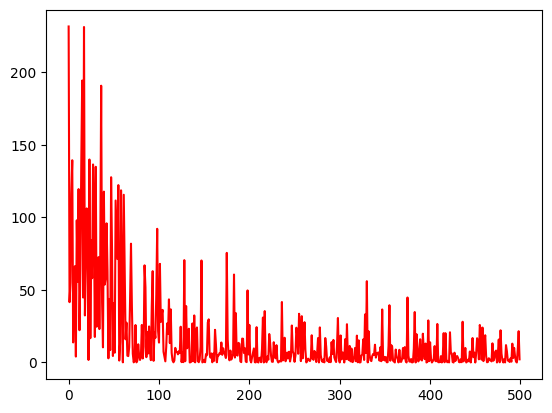

In [ ]:
# Kết quả loss values sử dụng Stochastic Gradient Descent
import matplotlib.pyplot as plt # import the pyplot module from matplotlib as plt
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01 )

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

## Question 1: Kết quả của đoạn code sau đây

In [ ]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

6754.643359356192


## 2.Hoàn thành fucntion mini_batch_gradient_descent() để huấn luyện data sử dụng Minibatch Gradient Descent

In [ ]:
def mini_batch_gradient_descent(X_b, y, n_epochs =50, minibatch_size=20, learning_rate =0.01):
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
154])
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # compute output
            # yhat = xi.dot(thetas)
            yhat = np.dot(xi, thetas)

            # compute loss
            #loss = (yhat - yi)*(yhat - yi)/2
            loss = ((yhat - yi) ** 2)*0.5

            # compute derivative of loss
            # grdloss = (yhat - yi)/minibatch_size
            grdloss = (yhat - yi)/minibatch_size

            # compute derivative of parameters
            # gradients = xi.T.dot(grdloss)
            gradients = np.dot(xi.T, grdloss)

            # update parameters
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
    return thetas_path, losses

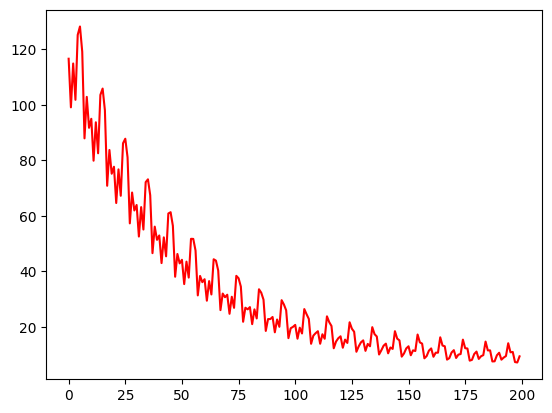

In [ ]:
# Kết quả loss values sử dụng Minibatch Gradient Descent
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color ="r")
plt.show ()

## Question 2: Kết quả của đoạn code sau đây

In [ ]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

8865.65


## 3.Hoàn thành fucntion batch_gradient_descent() để huấn luyện data sử dụng batch Gradient Descent

In [ ]:
def batch_gradient_descent(X_b, y, n_epochs =100, learning_rate=0.01):
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # compute output
        # yhat = X_b.dot(thetas)
        yhat = np.dot(X_b, thetas)

        # Compute loss
        #loss = (yhat - y)*(yhat - y)
        loss = ((yhat - y) ** 2)

        # Compute losss 's derivative
        grdloss = 2*(yhat - y)/N

        # Compute parameters ' derivative
        # gradients = X_b.T.dot(grdloss)
        gradients = np.dot(X_b.T, grdloss)

        # Update parameters
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)
    return thetas_path' losses

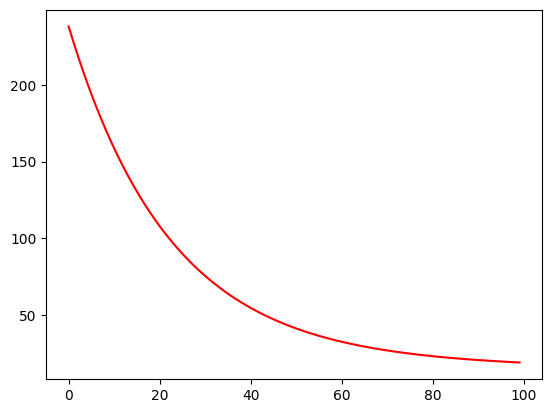

In [ ]:
# Kết quả loss values sử dụng batch Gradient Descent
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs =100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color ="r")
plt.show ()

##Question 3: Kết quả của đoạn code sau đây

In [ ]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses), 2))

6716.46


# Bài tập 2. Bitcoin forecasting

## 1.Downloading...

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/MODULE04/data

/content/drive/MyDrive/Colab Notebooks/MODULE04/data


In [ ]:
# https://drive.google.com/file/d/1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q/view
!gdown 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: /content/drive/MyDrive/Colab Notebooks/MODULE04/data/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 53.6MB/s]


In [ ]:
%cd ..

/content/drive/MyDrive/Colab Notebooks/MODULE04


##2.Đọc bộ dữ liệu

In [ ]:
#Đọc bộ dữ liệu
# Load dataset
import pandas as pd
df = pd.read_csv('data/BTC-Daily.csv')
# Remove duplicate rows
df = df.drop_duplicates()

In [ ]:
df.shape

(2651, 9)

In [ ]:
df[:5]

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df.describe()

,unix,date,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,2018-07-15 00:00:00,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
min,1.417133e+09,2014-11-28 00:00:00,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,2016-09-20 12:00:00,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,2018-07-15 00:00:00,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,2020-05-07 12:00:00,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,2022-03-01 00:00:00,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09
std,6.613247e+07,NaN,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        2651 non-null   int64         
 1   date        2651 non-null   datetime64[ns]
 2   symbol      2651 non-null   object        
 3   open        2651 non-null   float64       
 4   high        2651 non-null   float64       
 5   low         2651 non-null   float64       
 6   close       2651 non-null   float64       
 7   Volume BTC  2651 non-null   float64       
 8   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 186.5+ KB


In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [ ]:
df['close'].describe()

,close
count,2651.000000
mean,11709.326213
std,16282.908704
min,162.000000
25%,654.370000
50%,6407.770000
75%,10726.425000
max,67559.000000


## 3.Phân tích dữ liệu
Thống kê giá kết thúc phiên qua các năm trong bộ dữ liệu

In [ ]:
# Phân tích dữ liệu: Thống kê giá kết thúc phiên qua các năm trong bộ dữ liệu
# Range of dates covered
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' +str (df['date'].dt.date.max())
print(date_range)


2014-11-28 to 2022-03-01


In [ ]:
# Biểu đồ giá kết thúc phiên trong năm 2021
# ####### Your code here ########
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25


In [ ]:
data2k17 = df[df['year'] == 2017]
data2k17.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
1521,1514678400,2017-12-31,BTC/USD,12640.00,14296.06,12491.21,13880.00,1.545526e+08,11583.42,2017,12,31
1522,1514592000,2017-12-30,BTC/USD,14340.00,14463.28,12050.00,12640.00,2.859856e+08,21749.67,2017,12,30
1523,1514505600,2017-12-29,BTC/USD,14470.07,15111.00,13998.00,14340.00,1.957276e+08,13505.70,2017,12,29
1524,1514419200,2017-12-28,BTC/USD,15364.93,15474.19,13500.00,14470.07,2.344286e+08,16557.22,2017,12,28
1525,1514332800,2017-12-27,BTC/USD,15764.44,16480.52,14484.00,15364.93,2.418610e+08,15643.75,2017,12,27


In [ ]:
data2k17.shape

(365, 12)

In [ ]:
dates2k17 = pd.date_range(start=f'{2017}-01-01', end=f'{2017}-12-31', freq='D')
dates2k17

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
year_month_day = pd.DataFrame(dates2k17, columns=['date'])
year_month_day['year'] = year_month_day['date'].dt.year
year_month_day['month'] = year_month_day['date'].dt.month
year_month_day['day'] = year_month_day['date'].dt.day
year_month_day.head()

,date,year,month,day
0,2017-01-01,2017,1,1
1,2017-01-02,2017,1,2
2,2017-01-03,2017,1,3
3,2017-01-04,2017,1,4
4,2017-01-05,2017,1,5


In [ ]:
year_month_day.shape

(365, 4)

In [ ]:
df.shape

(2651, 12)

In [ ]:
merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
merged_data.shape


(365, 13)

In [ ]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
year_month_day.columns

Index(['date', 'year', 'month', 'day'], dtype='object')

In [ ]:
merged_data.columns

Index(['date_x', 'year', 'month', 'day', 'unix', 'date_y', 'symbol', 'open',
       'high', 'low', 'close', 'Volume BTC', 'Volume USD'],
      dtype='object')

In [ ]:
merged_data.head()

,date_x,year,month,day,unix,date_y,symbol,open,high,low,close,Volume BTC,Volume USD
0,2017-01-01,2017,1,1,1483228800,2017-01-01,BTC/USD,966.34,1005.00,960.53,998.80,6579903.85,6665.42
1,2017-01-02,2017,1,2,1483315200,2017-01-02,BTC/USD,997.75,1032.00,990.01,1014.10,8190254.59,8085.06
2,2017-01-03,2017,1,3,1483401600,2017-01-03,BTC/USD,1011.44,1039.00,999.99,1036.99,8955192.92,8779.72
3,2017-01-04,2017,1,4,1483488000,2017-01-04,BTC/USD,1035.51,1139.89,1028.56,1122.56,23257162.08,21371.60
4,2017-01-05,2017,1,5,1483574400,2017-01-05,BTC/USD,1114.38,1136.72,885.41,994.02,35036904.22,34736.36


In [ ]:
unique_years = df['year'].unique()

In [ ]:
unique_years

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int32)

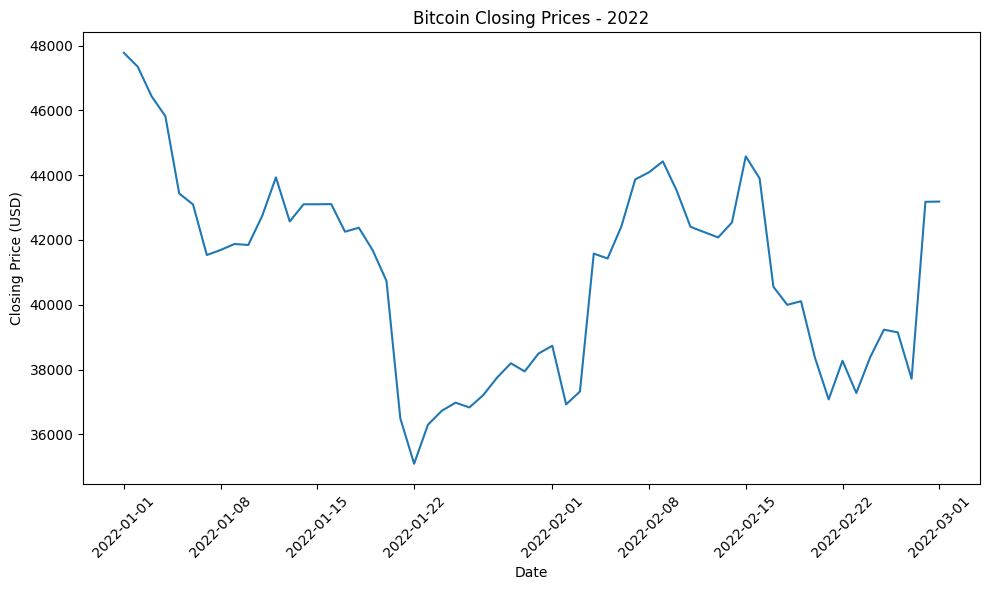

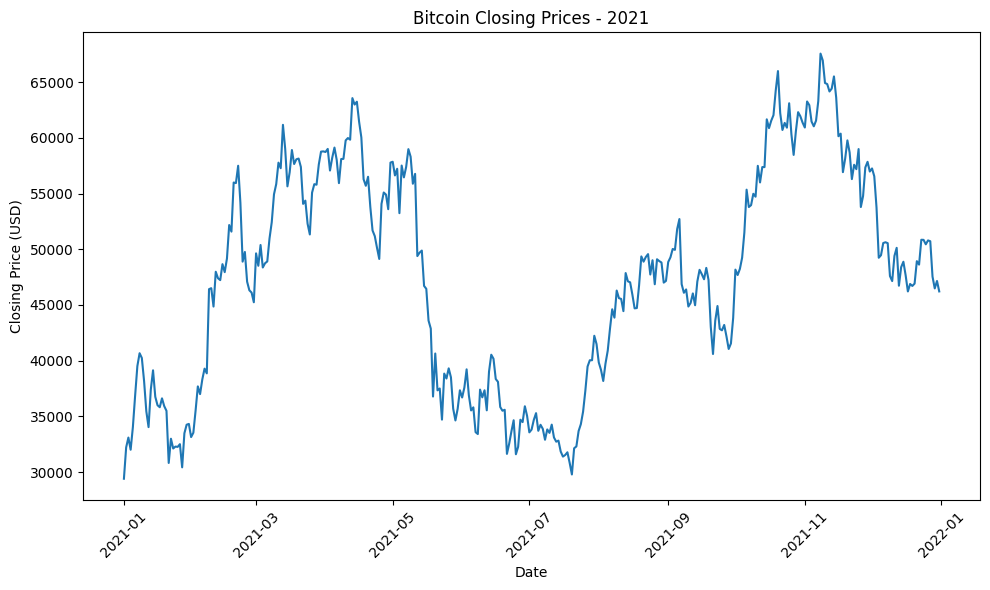

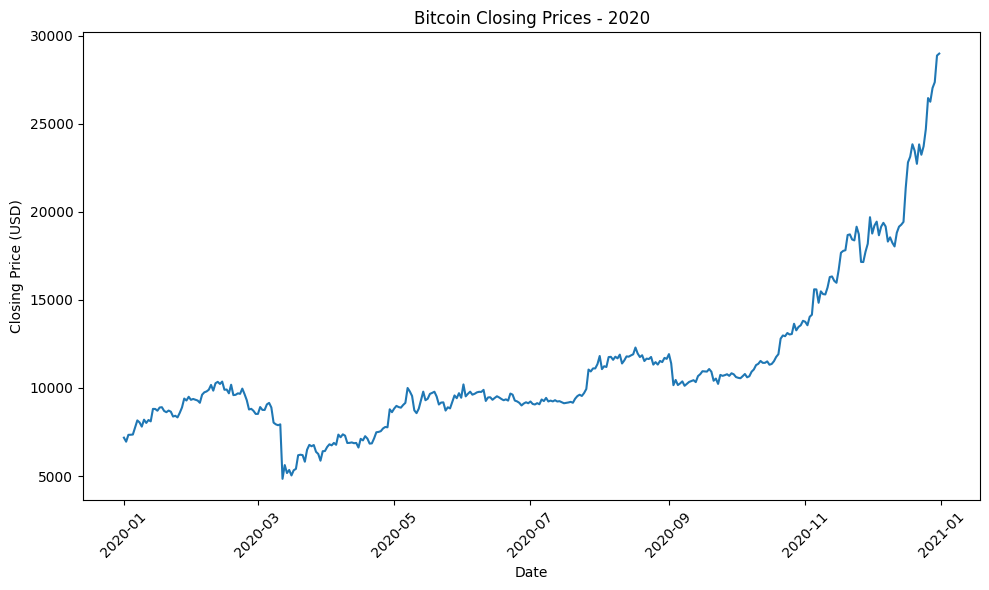

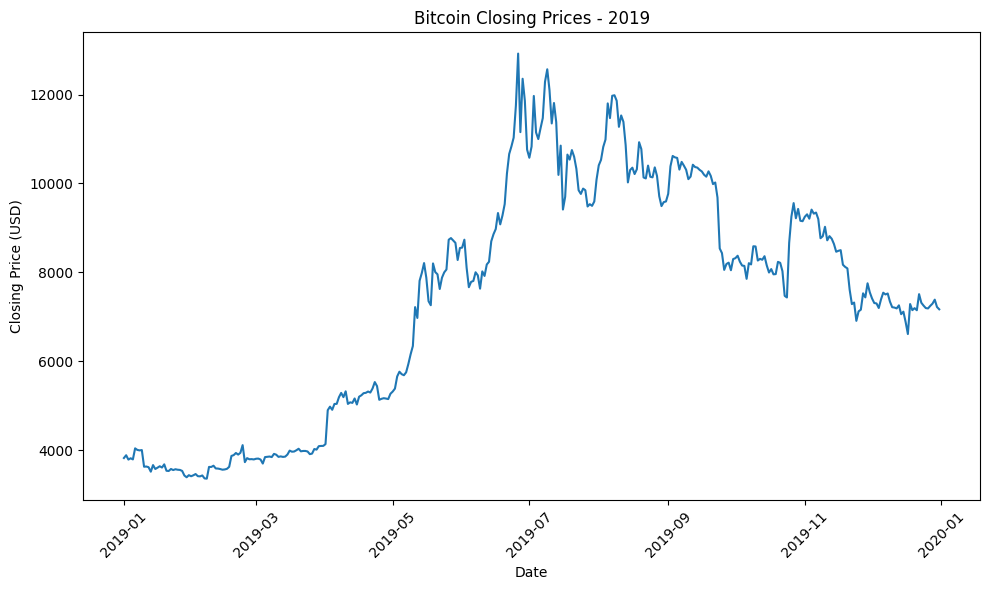

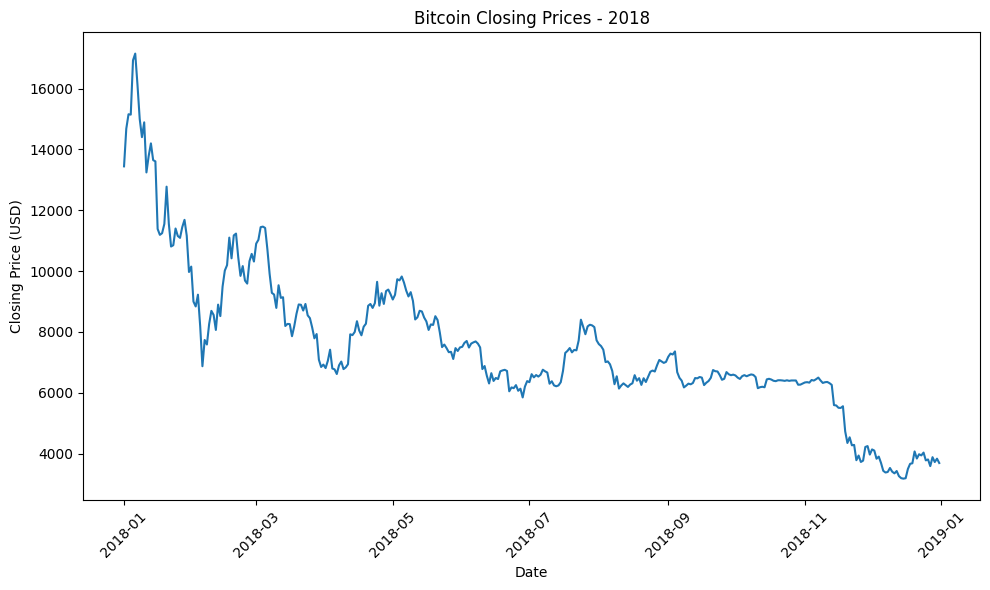

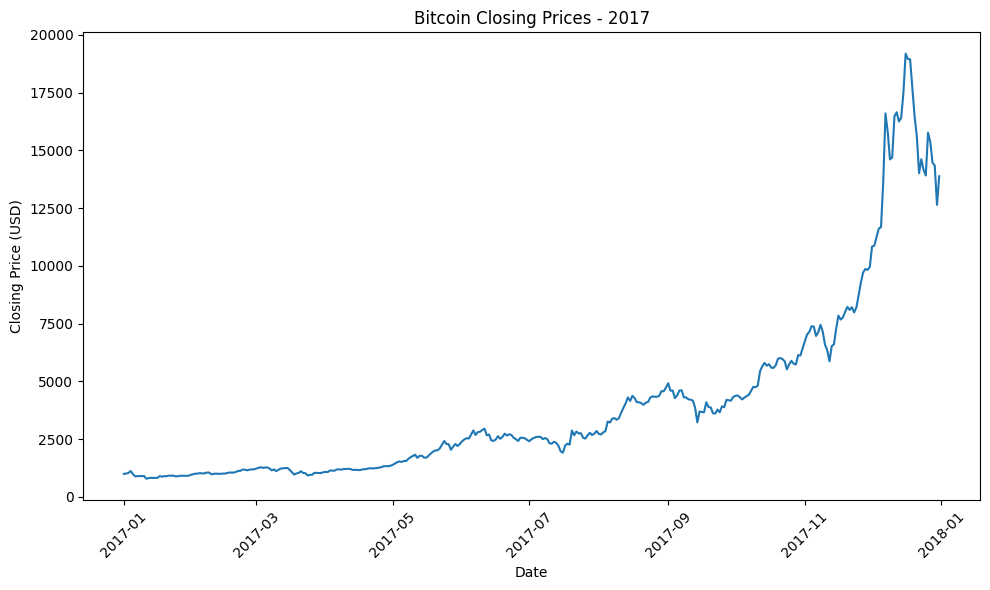

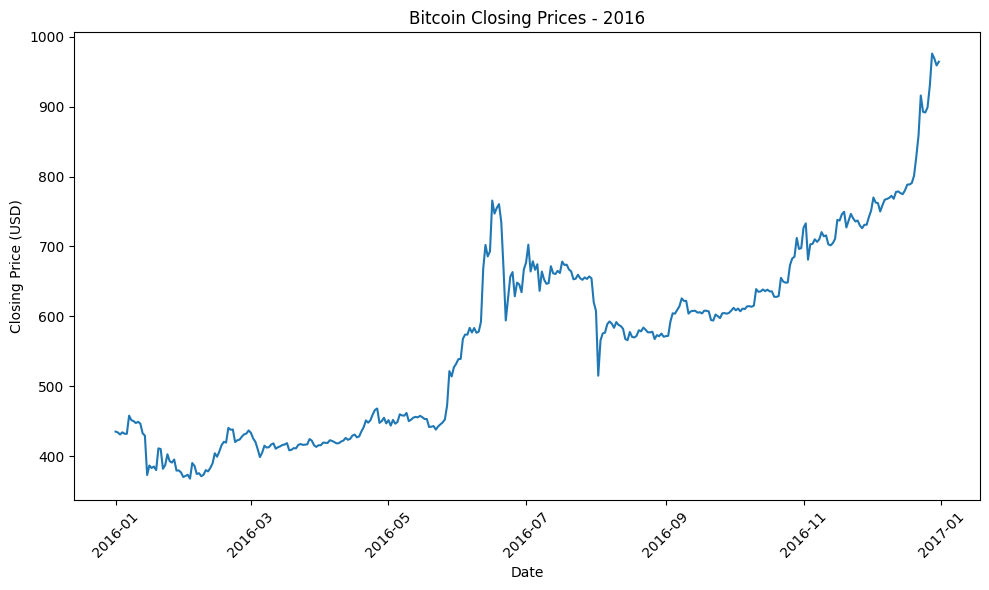

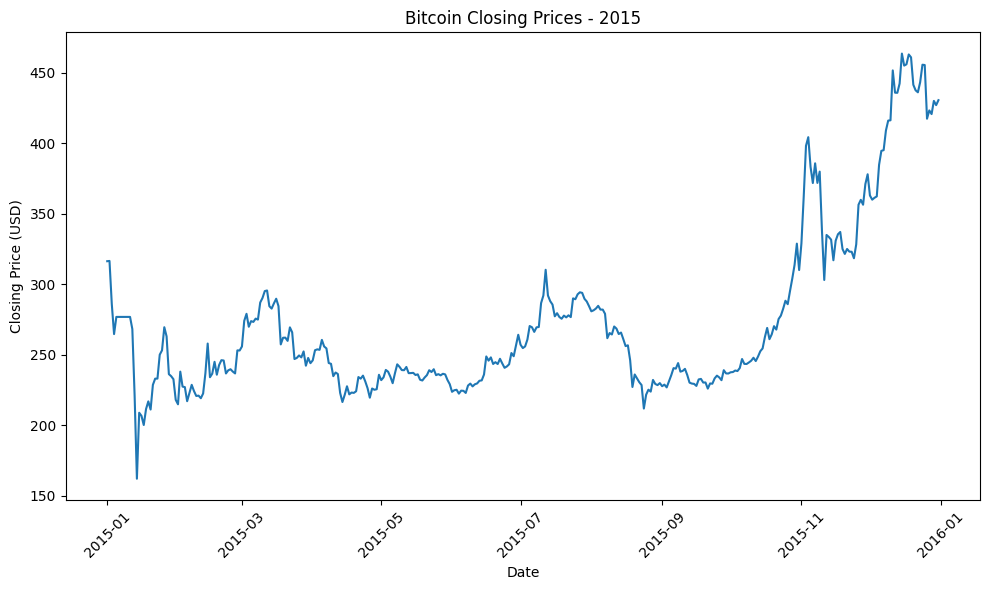

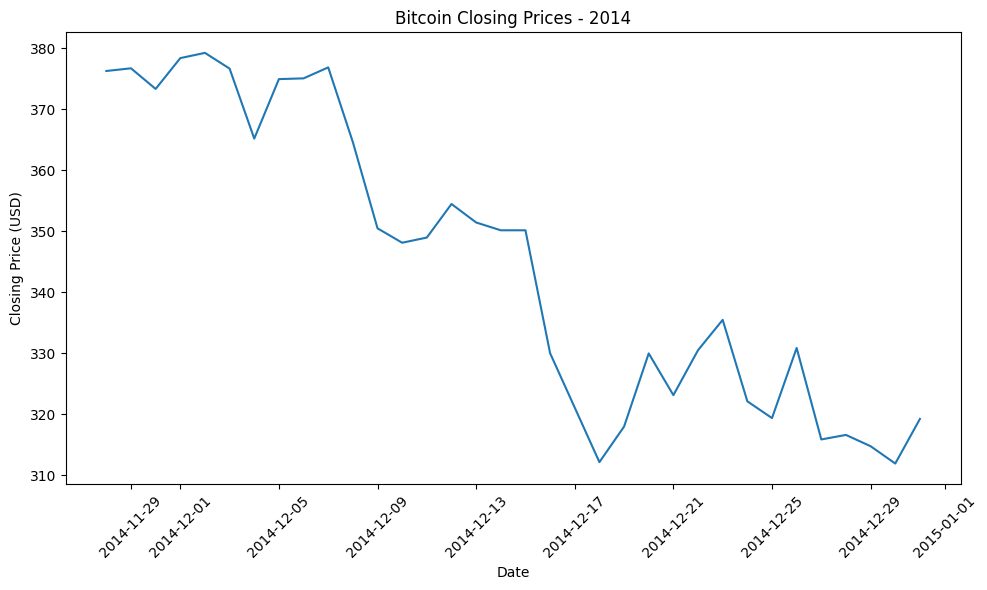

In [ ]:
# cách 1
for year in unique_years:
    # ####### Your code here ########
    year_data = df[df['year'] == year]
    plt.figure(figsize=(10, 6))
    plt.plot(year_data['date'], year_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

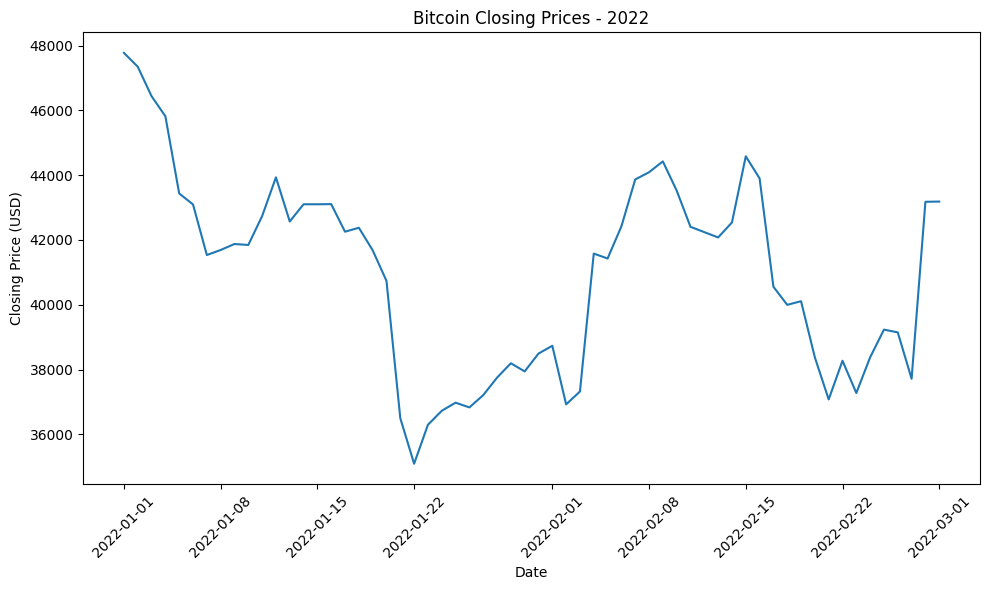

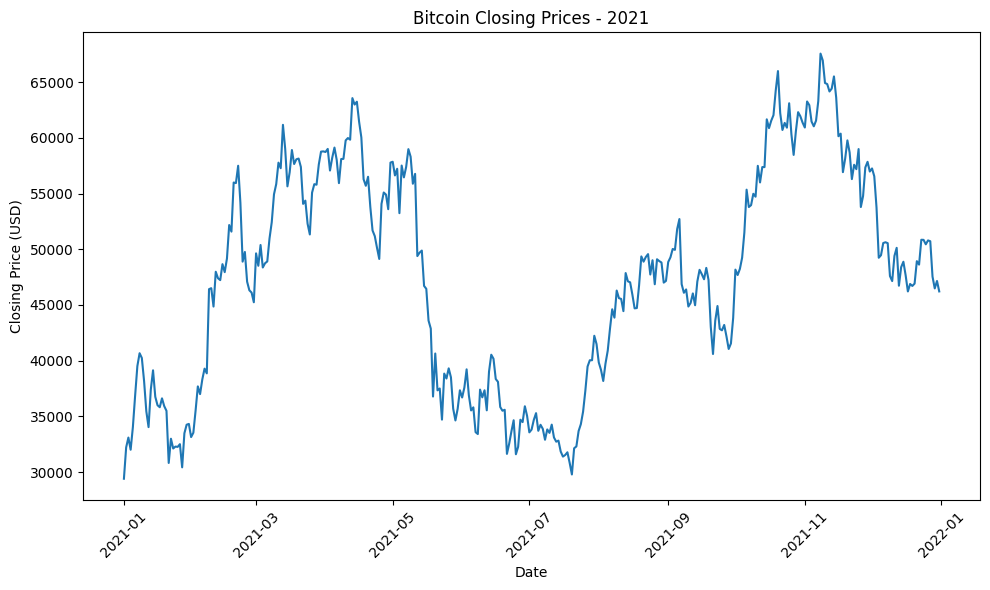

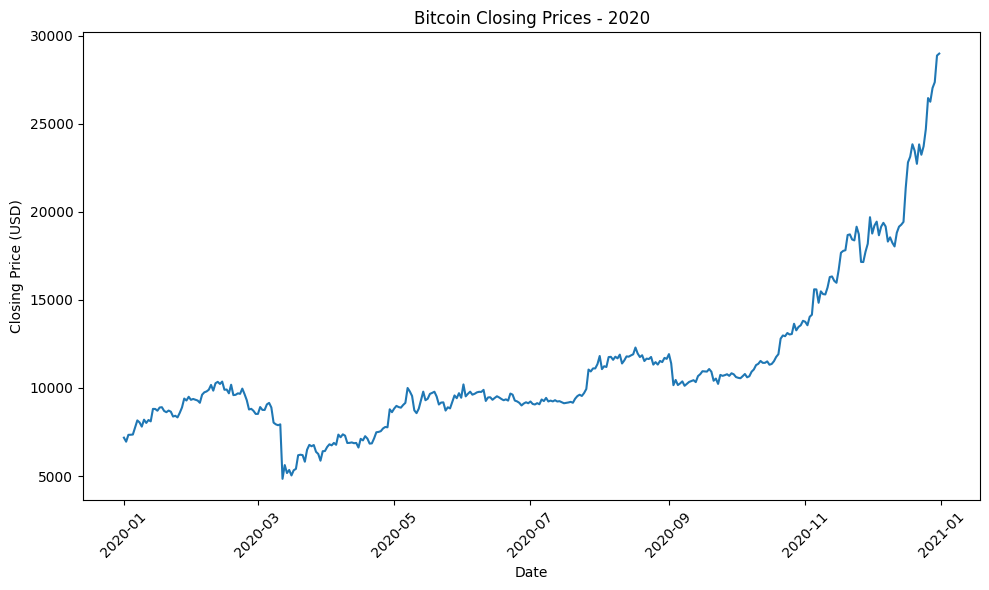

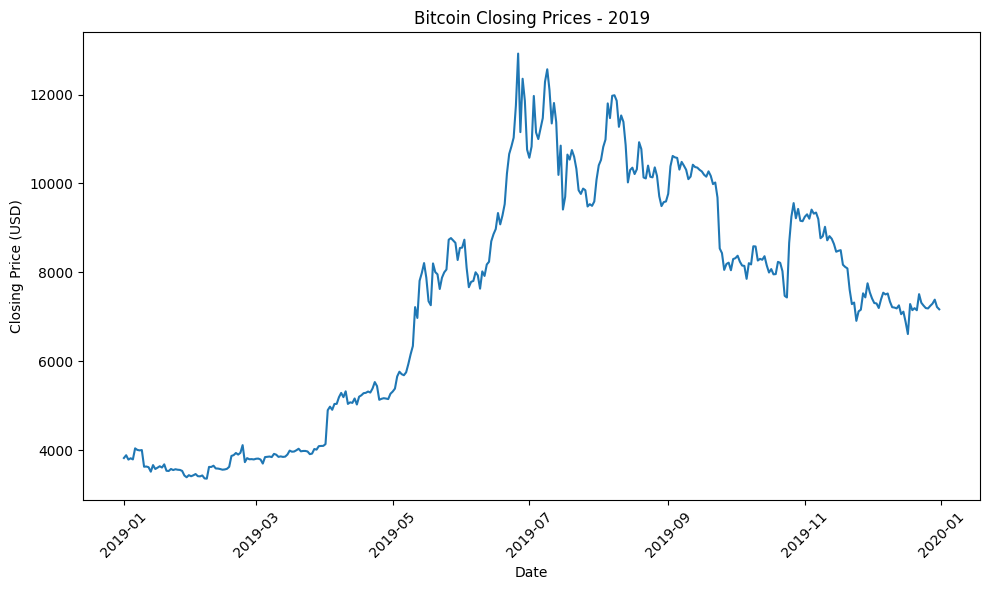

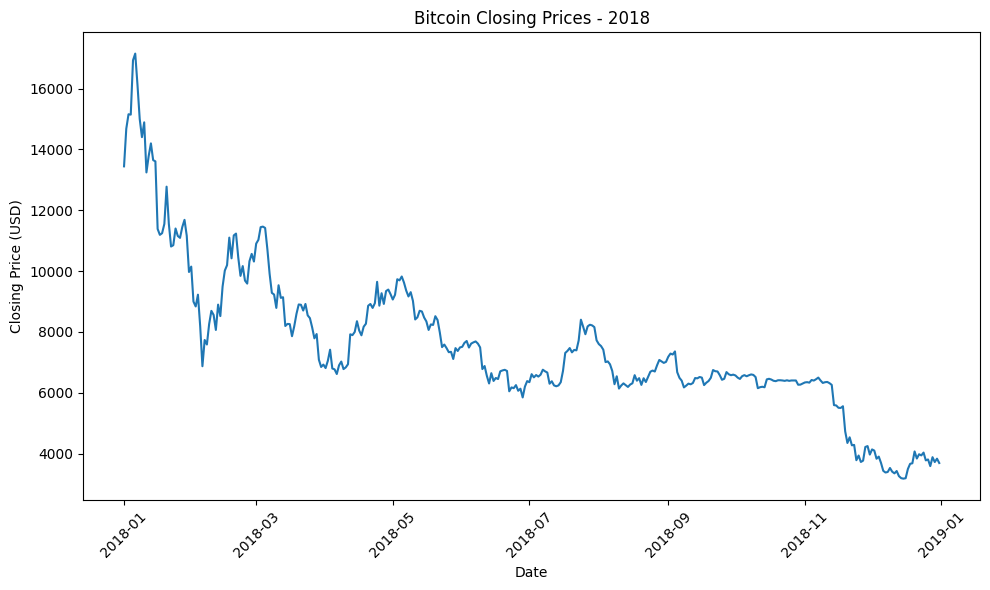

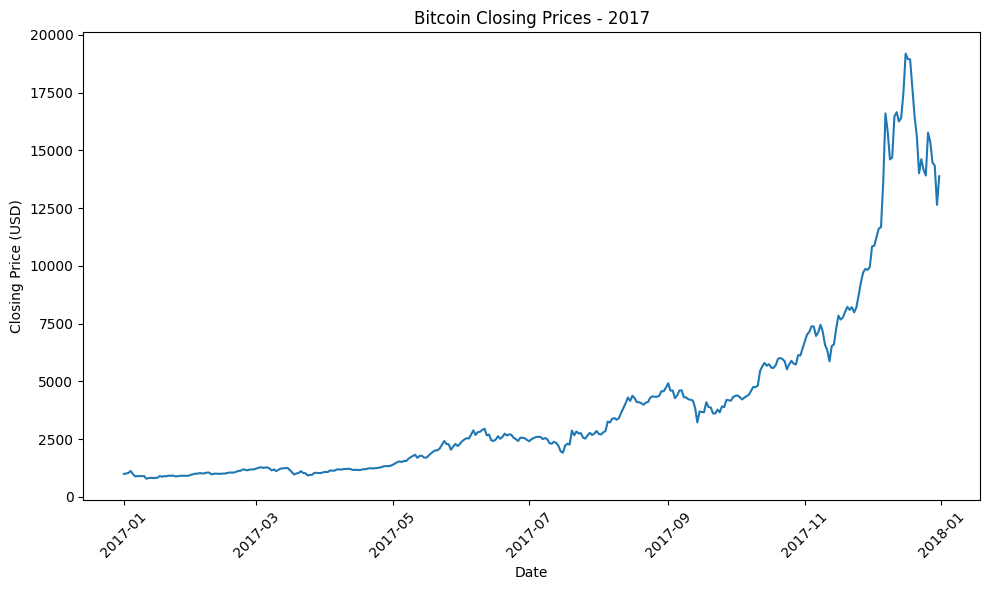

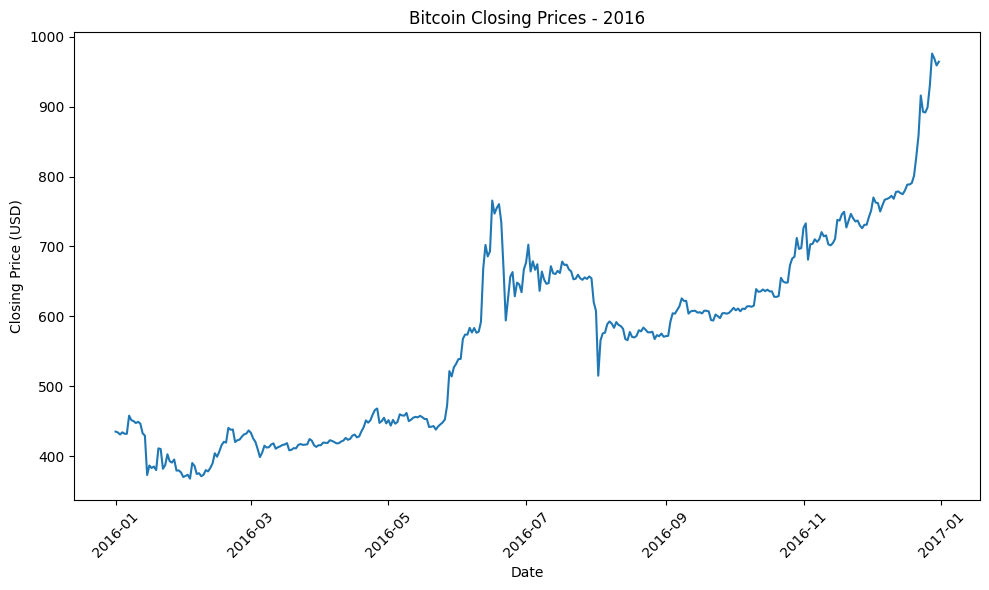

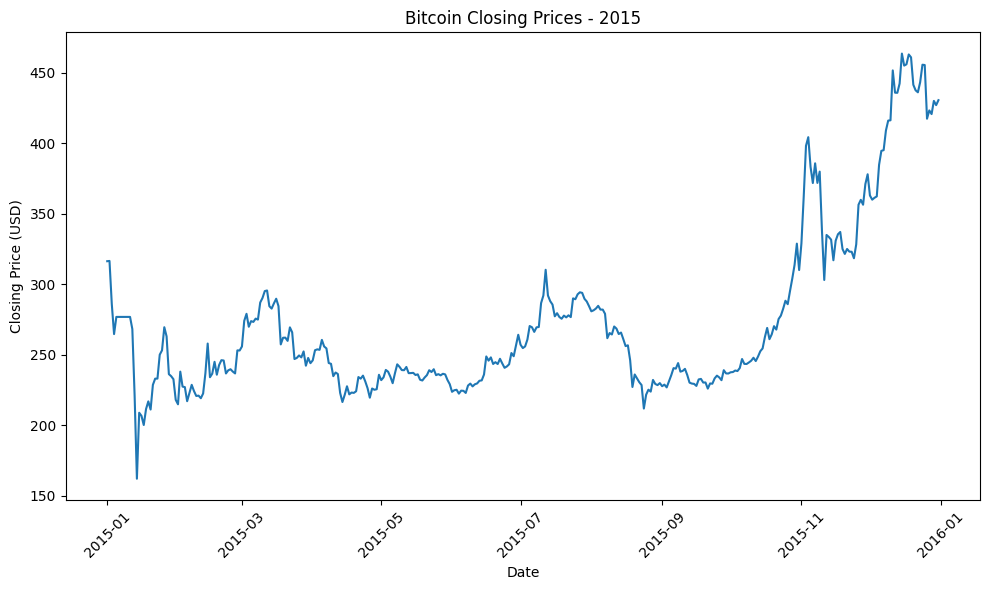

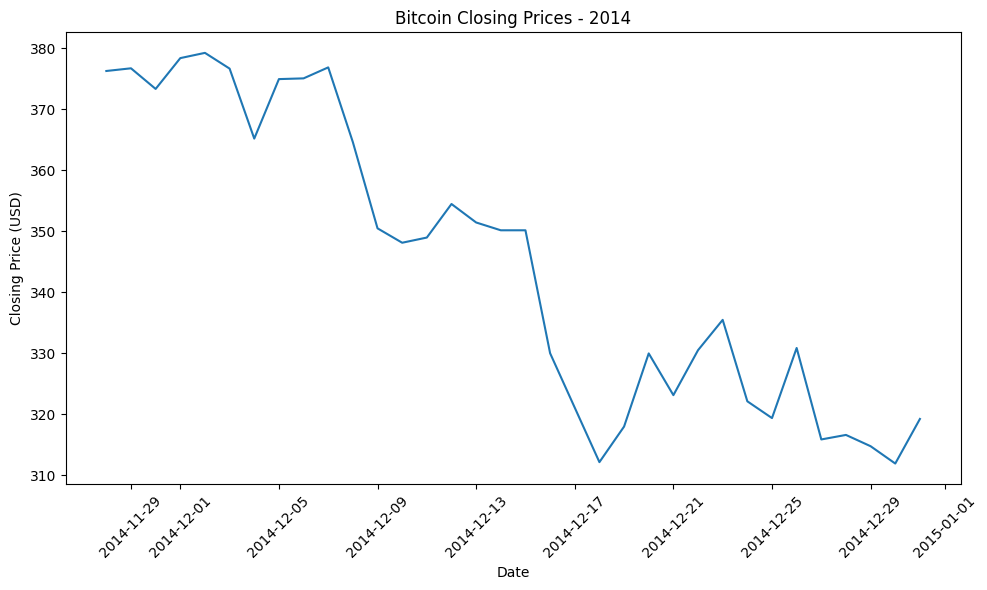

In [ ]:
#cách 2
for year in unique_years:
    # ####### Your code here ########
    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame(dates, columns=['date'])
    year_month_day['year'] = year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day

    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Question 4: Sau khi đoạn code bên trên được hoàn thiện chính xác, có bao nhiêu biểu đồ thể hiện giá qua các năm ?

In [ ]:
unique_years.shape[0]

9

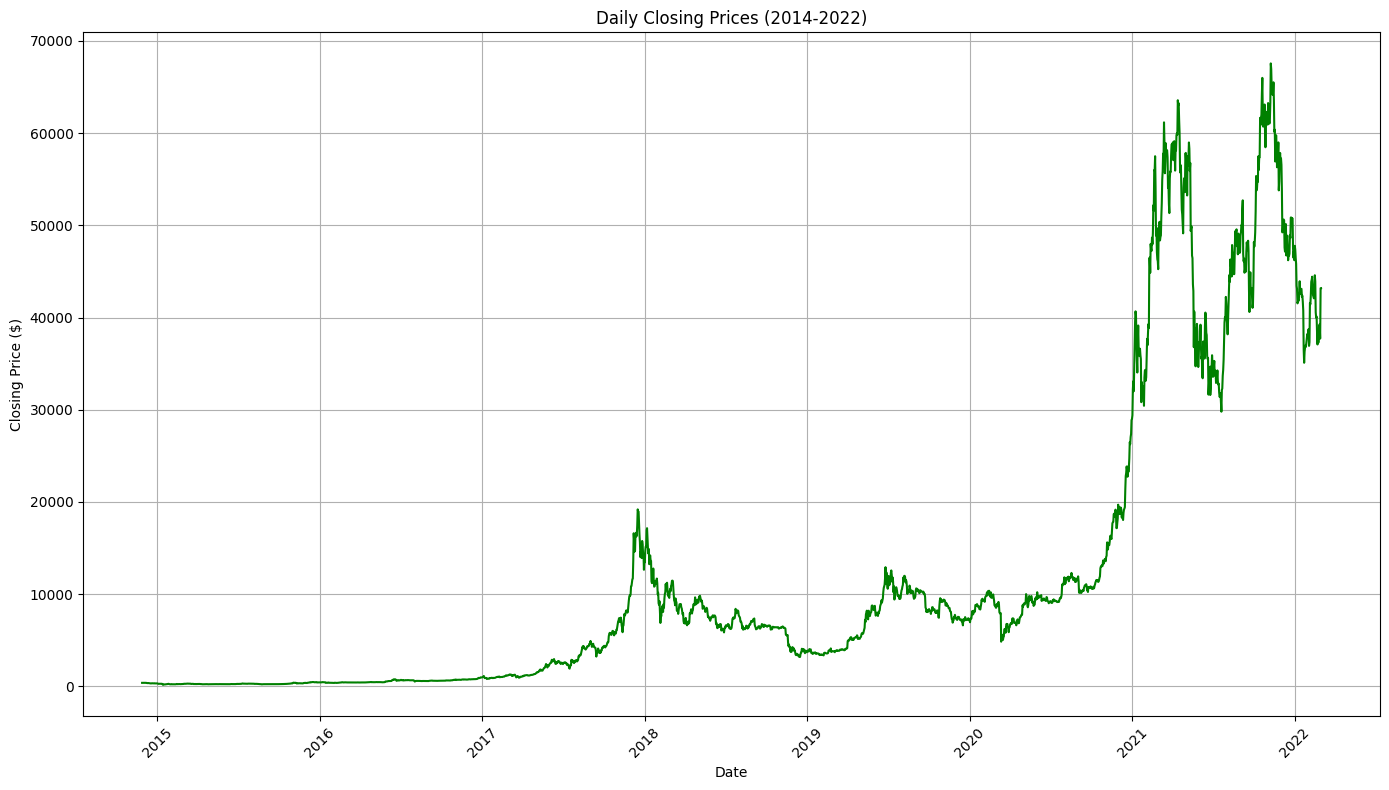

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['close'], linestyle='-', color='g')
plt.title('Daily Closing Prices (2014-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Biểu đồ nến giá giao dịch từ năm 2019 - 2022

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
# Filter data for 2019 -2022
df_filtered = df[(df['date']>='2019-01-01')&(df['date']<='2022-12-31')]
df_filtered.shape

(1156, 12)

In [ ]:
# Filter data for 2019 -2022
df_filtered = df[(df['year']>=2019)&(df['year']<=2022)]
df_filtered.shape

(1156, 12)

In [ ]:
df_filtered['date'].head()

,date
0,2022-03-01
1,2022-02-28
2,2022-02-27
3,2022-02-26
4,2022-02-25


In [ ]:
# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


<ipython-input-74-cc77405c93a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


In [ ]:
df_filtered['date'].head()

,date
0,19052.0
1,19051.0
2,19050.0
3,19049.0
4,19048.0


<ipython-input-76-a6c5ccfe8758>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


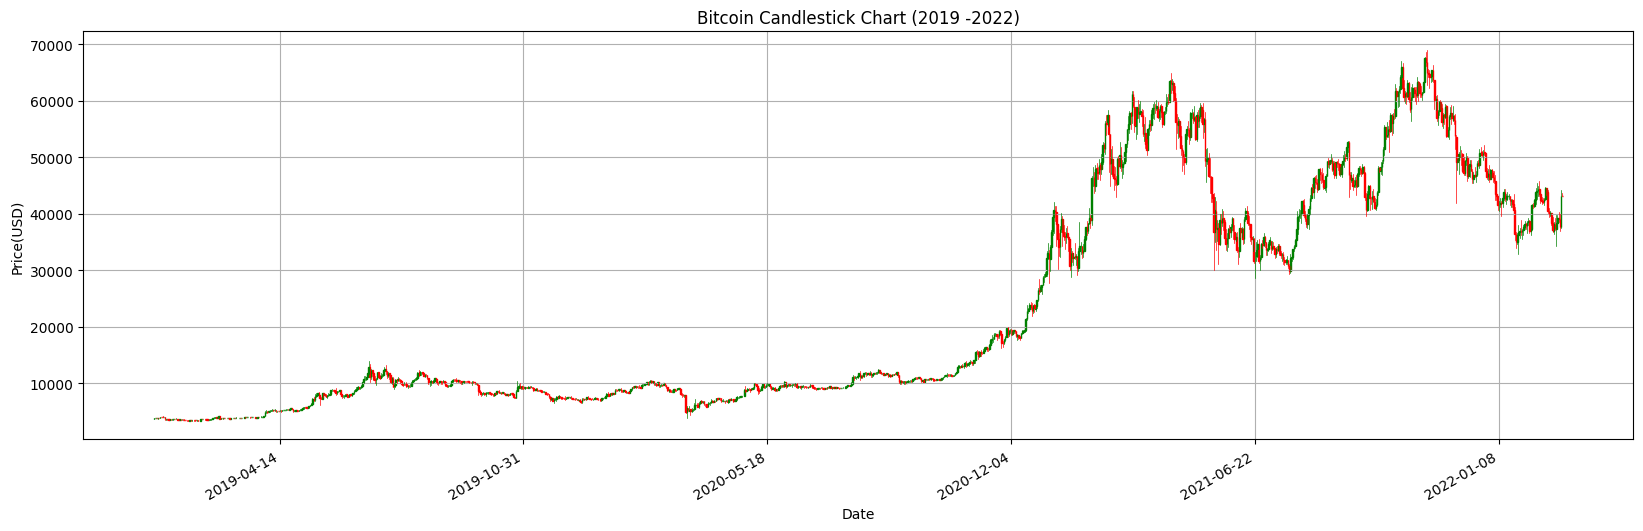

In [ ]:
#Biểu đồ giao dịch từ năm 2019 - 2022
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019 -2022
df_filtered = df[(df['date']>='2019-01-01')&(df['date']<='2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))
candlestick_ohlc(ax, df_filtered[['date','open','high','low','close']].values, width=0.6, colorup='g', colordown='r')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()
plt.title('Bitcoin Candlestick Chart (2019 -2022)')
plt.xlabel('Date')
plt.ylabel('Price(USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')
plt.show()

## 4.Tạo mô hình Linear Regression

In [ ]:
# Tạo mô hình Linear Regression
def predict(X, w, b):
    y_hat = np.dot(X, w) + b
    return(y_hat)

def gradient(y_hat, y, x):
    loss = y_hat - y
    N = len(y)
    dw = (1/N) * np.dot(x.T, loss)
    db = (1/N) * np.sum(loss)
    cost = (1/(2*N)) * np.sum(np.square(loss))
    return(dw, db, cost)

'''
def update_weight(w, b, lr, dw, db):
    w = w - lr * dw
    b = b - lr * db
    return(w, b)
'''
def update_weight(w, b, lr, dw, db):
    w_new = w - dw*lr
    b_new = b - db*lr
    return(w_new, b_new)

## Question 5: Đoạn code nào dưới đây phù hợp cho function predict

In [ ]:
#return x.dot(w)+b (**)

## Question 6: Đoạn code nào dưới đây phù hợp cho function gradient

In [ ]:
#loss = y_hat -y
#dw = x.T.dot( loss )/ len(y)
#db = np.sum( loss )/len(y)
#cost = np.sum ( loss **2) /(2* len(y))
#return (dw'db' cost ) (**)

## Question 7: Đoạn code nào dưới đây phù hợp cho function update_weight

In [ ]:
#w_new = w - dw*lr
#b_new = b - db*lr
#return (w_new' b_new ) (**)

## 5. Chuẩn hóa dữ liệu và chia tập train và test

In [ ]:
df.shape

(2651, 12)

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25


In [ ]:
# Chuẩn hóa
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

df['NumericalDate'] = pd.to_numeric(df['date'].dt.strftime('%Y%m%d%H%M%S'))


In [ ]:
df.shape

(2651, 17)

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day,Standardized_Close_Prices,Standardized_Open_Prices,Standardized_High_Prices,Standardized_Low_Prices,NumericalDate
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1,1.933444,1.937893,1.887415,2.029161,20220301000000
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28,1.933045,1.599553,1.925034,1.665409,20220228000000
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27,1.597274,1.687421,1.663971,1.636567,20220227000000
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26,1.685357,1.693320,1.690505,1.737377,20220226000000
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25,1.690577,1.639126,1.654474,1.700955,20220225000000


In [ ]:
# Chia tập dữ liệu train & test

#X = df[['NumericalDate','Standardized_Open_Prices', 'Standardized_High_Prices', 'Standardized_Low_Prices']]
X = df[['Standardized_Open_Prices', 'Standardized_High_Prices', 'Standardized_Low_Prices']]
y = df['Standardized_Close_Prices']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## 6. Huấn luyện mô hình Linear Regression

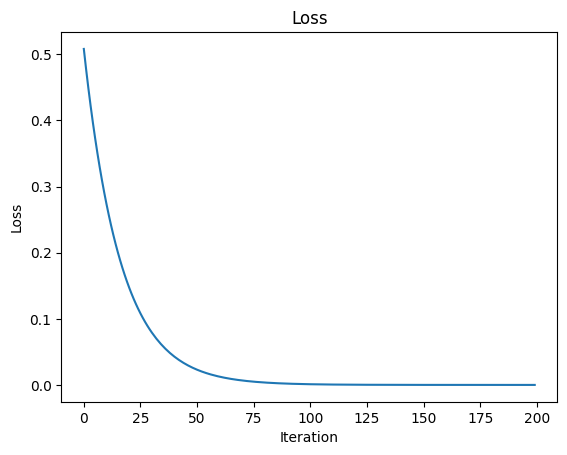

In [ ]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features) # Initialize weights
    b = 0 # Initialize bias
    losses = []
    # ##### Your code here #####
    for i in range(num_iterations):
        # Compute output
        y_hat = predict(X, w, b)

        # Compute gradients
        dw, db, loss = gradient(y_hat, y, X)

        # Update parameters
        w, b = update_weight(w, b, learning_rate, dw, db)

        losses.append(loss)
    return w, b, losses

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, learning_rate=0.01, num_iterations=200)
# Biểu đồ hàm loss trong quá trình huấn luyện
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

## Question 8: Đoạn code nào dưới đây phù hợp cho việc huấn luyện mô hình bên dưới sử dụng Batch Gradient Descen

In [ ]:
'''
for _ in range ( num_iterations ):
y_hat = predict (X, w, b)
dw , db , cost = gradient (y_hat , y, X)
w, b = update_weight (w, b, learning_rate , dw , db)
losses . append ( cost )
'''

## Question 9: Giá trị của RMSE, MAE và R2 lần lượt là (làm tròn 4 số thập phân)

In [ ]:
from sklearn.metrics import r2_score
# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test )) * 100

# Calculate R- squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R- squared on testing data
test_accuracy = r2_score(y_test, y_pred)
print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


## 8. Inference: Thực nghiệm mô hình trên giá từ 01/01/2019 - 01/04/2019

<ipython-input-99-503a96489a77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_filter['predicted_close'] = df_2019_filter['close'].shift(1)


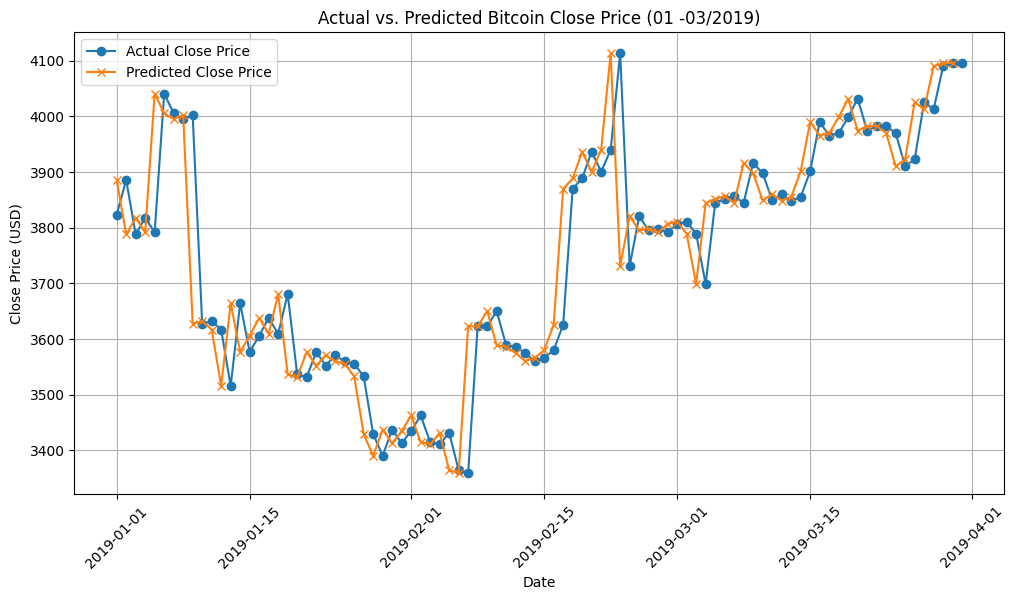

In [ ]:
#Biểu đồ so sánh giá kết thúc phiên thực tế và dự đoán của Bitcoin (01/2019 - 04/2019)
# Filter data for 2019 -01 -01 to 2019 -04 -01
df_2019_filter = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]
df_2019_filter['predicted_close'] = df_2019_filter['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_filter['date'], df_2019_filter['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_filter['date'], df_2019_filter['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01 -03/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()